In [1]:
from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download dataset
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

# Unzip
!unzip gtsrb-german-traffic-sign.zip -d gtsrb

Streaming output truncated to the last 5000 lines.
  inflating: gtsrb/train/5/00005_00053_00010.png  
  inflating: gtsrb/train/5/00005_00053_00011.png  
  inflating: gtsrb/train/5/00005_00053_00012.png  
  inflating: gtsrb/train/5/00005_00053_00013.png  
  inflating: gtsrb/train/5/00005_00053_00014.png  
  inflating: gtsrb/train/5/00005_00053_00015.png  
  inflating: gtsrb/train/5/00005_00053_00016.png  
  inflating: gtsrb/train/5/00005_00053_00017.png  
  inflating: gtsrb/train/5/00005_00053_00018.png  
  inflating: gtsrb/train/5/00005_00053_00019.png  
  inflating: gtsrb/train/5/00005_00053_00020.png  
  inflating: gtsrb/train/5/00005_00053_00021.png  
  inflating: gtsrb/train/5/00005_00053_00022.png  
  inflating: gtsrb/train/5/00005_00053_00023.png  
  inflating: gtsrb/train/5/00005_00053_00024.png  
  inflating: gtsrb/train/5/00005_00053_00025.png  
  inflating: gtsrb/train/5/00005_00053_00026.png  
  inflating: gtsrb/train/5/00005_00053_00027.png  
  inflating: gtsrb/train/5/0000

In [22]:
import pandas as pd
import os
import cv2
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
import pathlib


In [23]:
data_dir = "/content/gtsrb"
train_csv = pd.read_csv(os.path.join(data_dir, "Train.csv"))


In [24]:
train_csv

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png
...,...,...,...,...,...,...,...,...
39204,52,56,5,6,47,51,42,Train/42/00042_00007_00025.png
39205,56,58,5,5,51,53,42,Train/42/00042_00007_00026.png
39206,58,62,5,6,53,57,42,Train/42/00042_00007_00027.png
39207,63,69,5,7,58,63,42,Train/42/00042_00007_00028.png


In [25]:
X, y = [], []
for i, row in train_csv.iterrows():
    img_path = os.path.join(data_dir, row['Path'])
    image = cv2.imread(img_path)
    image = cv2.resize(image, (32, 32))
    X.append(image)
    y.append(row['ClassId'])
print(len(X))
print(len(y))

39209
39209


In [26]:
X = np.array(X) / 255.0

In [27]:
y = to_categorical(y)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Data Split Done! Train Shape:", X_train.shape, "Test Shape:", X_test.shape)

Data Split Done! Train Shape: (31367, 32, 32, 3) Test Shape: (7842, 32, 32, 3)


In [30]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [31]:
datagen = ImageDataGenerator(rotation_range=10, zoom_range=0.15, width_shift_range=0.1, height_shift_range=0.1)

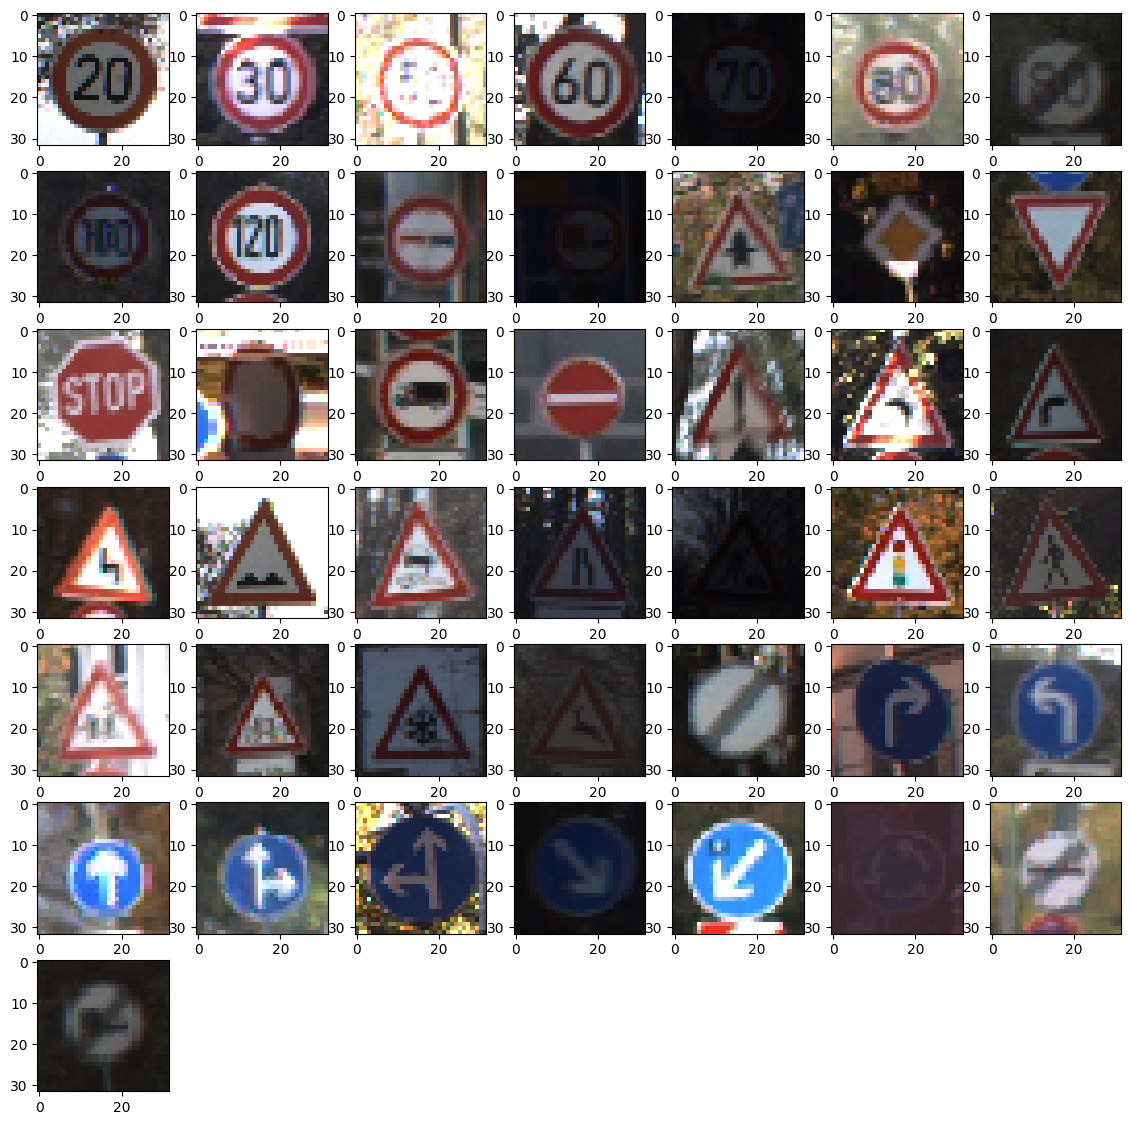

In [32]:
NUM_CATEGORIES = 43
IMG_WIDTH, IMG_HEIGHT = 32, 32
train_path = os.path.join(data_dir, "Train")
img_dir = pathlib.Path(train_path)
plt.figure(figsize=(14, 14))
for i in range(NUM_CATEGORIES):
    plt.subplot(7, 7, i+1)
    sign = list(img_dir.glob(f'{i}/*'))[0]
    img = load_img(sign, target_size=(IMG_WIDTH, IMG_HEIGHT))
    plt.imshow(img)
plt.show()

In [33]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(43, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 43)             │        11,051 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,627 (920.42 KB)

 Trainable params: 235,627 (920.42 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [36]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=32), validation_data=(X_test, y_test), epochs=15)

Epoch 1/15


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


981/981 ━━━━━━━━━━━━━━━━━━━━ 70s 69ms/step - accuracy: 0.2047 - loss: 2.8735 - val_accuracy: 0.7261 - val_loss: 0.8549
Epoch 2/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 66s 67ms/step - accuracy: 0.6925 - loss: 0.9344 - val_accuracy: 0.9223 - val_loss: 0.2976
Epoch 3/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 88s 74ms/step - accuracy: 0.8494 - loss: 0.4766 - val_accuracy: 0.9528 - val_loss: 0.1565
Epoch 4/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 71s 73ms/step - accuracy: 0.8992 - loss: 0.3203 - val_accuracy: 0.9748 - val_loss: 0.0853
Epoch 5/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 78s 69ms/step - accuracy: 0.9303 - loss: 0.2240 - val_accuracy: 0.9818 - val_loss: 0.0680
Epoch 6/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 68s 70ms/step - accuracy: 0.9449 - loss: 0.1724 - val_accuracy: 0.9811 - val_loss: 0.0624
Epoch 7/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 71s 72ms/step - accuracy: 0.9529 - loss: 0.1591 - val_accuracy: 0.9874 - val_loss: 0.0473
Epoch 8/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 69s 70ms/step - accuracy: 0.9599 - loss: 0.1340 - val_accurac

In [37]:
loss, acc = model.evaluate(X_test, y_test)

246/246 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9934 - loss: 0.0228


In [38]:
print(f"Test Accuracy: {acc*100:.2f}%")

Test Accuracy: 99.18%


Text(0.5, 1.0, 'Model Accuracy')

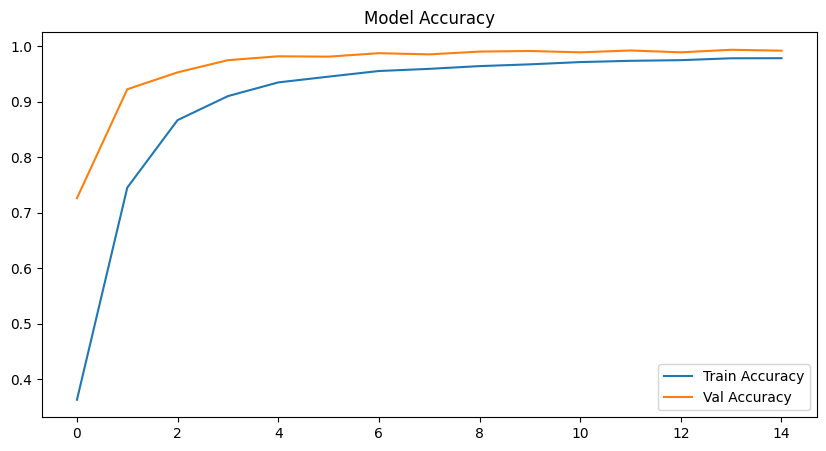

In [39]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Model Accuracy')

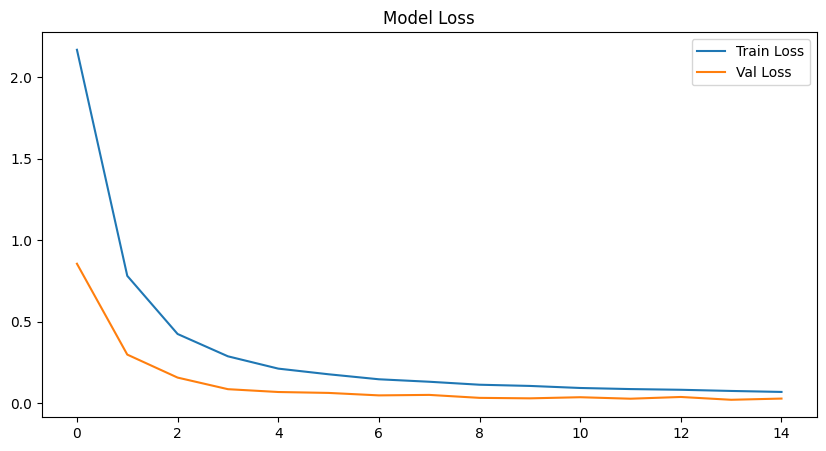

In [40]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


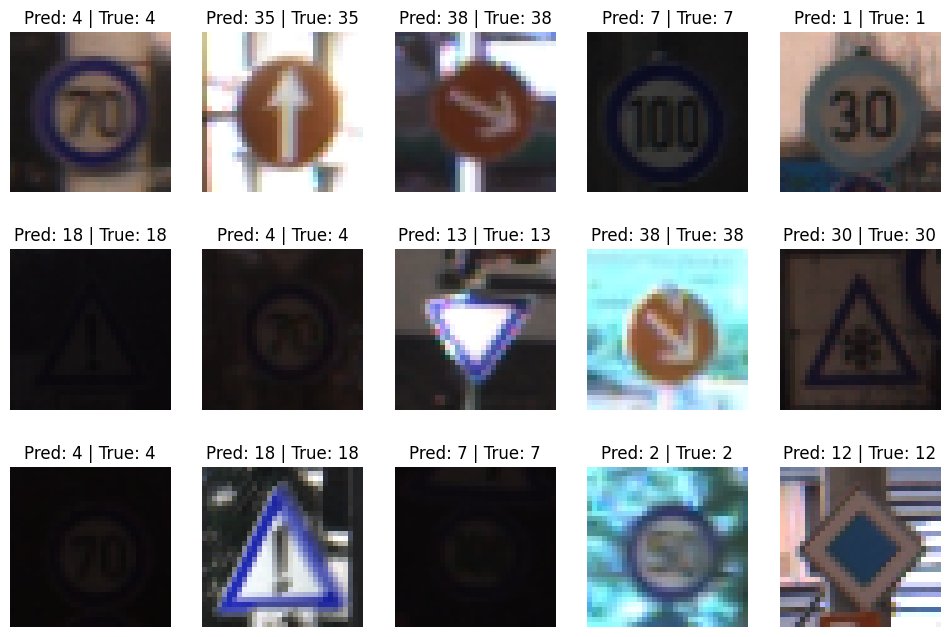

In [41]:
def predict_sample_images():
    fig, axes = plt.subplots(3, 5 , figsize=(12, 8))
    for i, ax in enumerate(axes.flat):
        img = X_test[i]
        true_label = np.argmax(y_test[i])
        pred_label = np.argmax(model.predict(img.reshape(1, 32, 32, 3)))
        ax.imshow(img)
        ax.set_title(f"Pred: {pred_label} | True: {true_label}")
        ax.axis('off')
    plt.show()

predict_sample_images()